In [1]:
#importing the packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
flightdata=pd.read_csv('flightdata.csv')

In [4]:
flightdata.head(20)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,01-01-2013 05:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,01-01-2013 06:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,01-01-2013 06:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,01-01-2013 06:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,01-01-2013 06:00


In [5]:
flightdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [6]:
flightdata.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [7]:
#Data Cleaning and Processing
NYCFD_df = flightdata.isnull().sum(axis=0).reset_index()
NYCFD_df.columns = ['variable', 'missing values']
NYCFD_df['filling factor (%)']=(flightdata.shape[0]-NYCFD_df['missing values'])/flightdata.shape[0]*100
NYCFD_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,air_time,9430,97.199919
1,arr_delay,9430,97.199919
2,arr_time,8713,97.412820
3,dep_time,8255,97.548816
4,dep_delay,8255,97.548816
5,tailnum,2512,99.254104
6,year,0,100.000000
7,hour,0,100.000000
8,distance,0,100.000000
9,dest,0,100.000000


In [8]:
#Drop rows with NaN value
flightdata_na = flightdata.dropna(how='any')

In [9]:
#Getting Mean grouped by carrier and origin
org_dep_delay=flightdata_na.groupby(['origin','carrier'])['dep_delay'].mean()
org_arr_delay=flightdata_na.groupby(['dest','carrier'])['arr_delay'].mean()

In [10]:
org_dep_delay.head(20)
org_arr_delay.head(20)

origin  carrier
EWR     9E          5.656329
        AA          9.985430
        AS          5.830748
        B6         13.009271
        DL         12.055879
        EV         20.049522
        MQ         17.312351
        OO         20.833333
        UA         12.429859
        US          3.699723
        VX         11.942655
        WN         17.799703
JFK     9E         18.702663
        AA         10.276176
        B6         12.711227
        DL          8.288779
        EV         18.520362
        HA          4.900585
        MQ         13.073121
        UA          7.811300
Name: dep_delay, dtype: float64

dest  carrier
ABQ   B6          4.381890
ACK   B6          4.852273
ALB   EV         14.397129
ANC   UA         -2.500000
ATL   9E          0.857143
      DL          7.424225
      EV         19.638285
      FL         20.744513
      MQ         14.034004
      UA         10.500000
      WN          6.896552
AUS   9E         -3.500000
      AA         16.209497
      B6         11.692722
      DL          1.409091
      UA          4.277108
      WN        -11.242321
AVL   9E        -12.100000
      EV          8.804781
BDL   EV          6.780247
Name: arr_delay, dtype: float64

In [11]:
#Method to fill Na values
def NA (df_na,df_value,col1,col2,updtCol):
    for index,row in df_value.iterrows():
        df_na.loc[(df_na[col1] == row.loc[col1]) & (df_na[col2] == row.loc[col2]),updtCol] = row.loc[updtCol]

In [12]:
#Pull Data = dep_delay is Na
dep_na_data=flightdata[flightdata.dep_delay.isna()]
df_org_dep_del = org_dep_delay.to_frame()
#Convert pandas index in a dataframe to a column
df_org_dep_del.reset_index(level=1, inplace=True)
df_org_dep_del.reset_index(level=0, inplace=True)
#Call function NA to fill dep_delay 
NA(dep_na_data,df_org_dep_del,'origin','carrier','dep_delay')
Nyc_na = flightdata.dropna(subset=['dep_delay'])
Nyc_na = Nyc_na.append(dep_na_data)

In [13]:
#Pull Data = arr_delay is Na
arr_na_data=Nyc_na[Nyc_na.arr_delay.isna()]
df_org_arr_del = org_arr_delay.to_frame()
df_org_arr_del.reset_index(level=1, inplace=True)
df_org_arr_del.reset_index(level=0, inplace=True) 
NA(arr_na_data,df_org_arr_del,'dest','carrier','arr_delay')
Nyc_na = Nyc_na.dropna(subset=['arr_delay'])
Nyc_na = Nyc_na.append(arr_na_data)
Nyc_na = Nyc_na.dropna(subset=['arr_delay'])

In [14]:
org_air_time=Nyc_na.groupby(['origin','dest'])['air_time'].mean()
org_air_time.head(20)

origin  dest
EWR     ALB      31.787081
        ANC     413.125000
        ATL     111.993847
        AUS     211.247649
        AVL      89.796813
        BDL      25.466019
        BNA     114.509148
        BOS      40.312750
        BQN     196.172881
        BTV      46.257336
        BUF      51.153846
        BWI      37.164122
        BZN     258.371429
        CAE      92.148936
        CHS      95.746091
        CLE      66.276879
        CLT      84.975680
        CMH      76.310496
        CVG      96.068046
        DAY      86.077578
Name: air_time, dtype: float64

In [15]:
airtime_data=Nyc_na[Nyc_na.air_time.isna()]
df_org_air_tim = org_air_time.to_frame()
df_org_air_tim.reset_index(level=1, inplace=True)
df_org_air_tim.reset_index(level=0, inplace=True)
#Fill air_time
NA(airtime_data,df_org_air_tim,'origin','dest','air_time')
Nyc_na = Nyc_na.dropna(subset=['air_time'])
Nyc_na = Nyc_na.append(airtime_data)

In [16]:
#Filling NaN
def Nyctailnum(df_na,df_value,col1,updtCol):
    for index,row in df_value.iterrows():
        df_na.loc[(df_na[col1] == row.loc[col1]) ,updtCol] = row.loc[updtCol]

In [17]:
#Dropping the Columns
flightdata_drop = flightdata_na.drop(['year','sched_dep_time','dep_time','sched_arr_time','arr_time','time_hour','flight'], axis=1 )

In [18]:
flightdata_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 12 columns):
month        327346 non-null int64
day          327346 non-null int64
dep_delay    327346 non-null float64
arr_delay    327346 non-null float64
carrier      327346 non-null object
tailnum      327346 non-null object
origin       327346 non-null object
dest         327346 non-null object
air_time     327346 non-null float64
distance     327346 non-null int64
hour         327346 non-null int64
minute       327346 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 32.5+ MB


In [19]:
#Departure Delay Month Wise
Dept_Month=flightdata.groupby('month',as_index=False)
df1=Dept_Month['dep_delay'].mean()

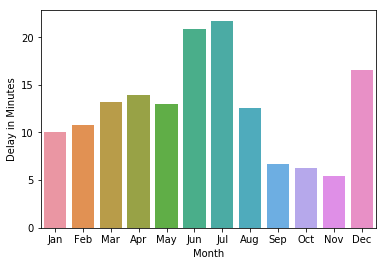

In [20]:
labels_month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax=sns.barplot(labels_month,df1['dep_delay'],data=df1)
ax.set(xlabel='Month', ylabel='Delay in Minutes')
plt.show();

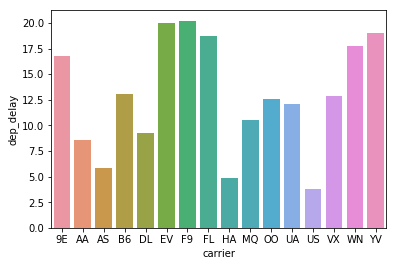

In [21]:
#Departure Delay Carrier Wise
Delay_carrier=flightdata.groupby('carrier',as_index=False)
Carrierdelay=Delay_carrier['dep_delay'].mean()
sns.barplot('carrier','dep_delay',data=Carrierdelay)
plt.show();

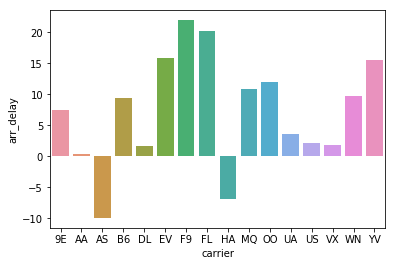

In [22]:
#Arrival Delay Carrier Wise
Carrier_Delay=Delay_carrier['arr_delay'].mean()
sns.barplot('carrier','arr_delay',data=Carrier_Delay)
plt.show();